# Micrograd Example Notebook 

In [23]:
from micrograd.core.engine import Value
from micrograd.nn import Neuron, Layer, MLP
from micrograd.utils.draw import draw_dot
import numpy as np
import torch

## Important Concepts

### Derivative

In mathematics, the derivative of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to a change in its argument (input value).

![image.png](derivative_formula.png)

In [2]:
# define a math function
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
# Derivative of a function with one input
# Input
x = 3.0
# Change the input slightly
h = 0.001
# Find the slope of the change
print((f(x + h) - f(x)) / h)

14.00300000000243


We have a positive slope. Let's consider a negative slope

In [4]:
# Input
x = -3.0
# Change the input slightly 
h = 0.001
# Find the slope of the change 
print((f(x + h) - f(x))  / h)

-21.996999999998934


Now, let's consider a derivative of a function with multiple inputs

In [5]:
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


Find the derivative of d

In [6]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0
# expression
d1 = a * b + c

# Change the input a slightly
a += h
d2 = a * b + c
print('d1', d1)
print('d2', d2)

print('slope', (d2-d1)/h) # this is how much the function increased when we changed a specific input with respect to a. 
# Then we normalize it by h to get slope

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


### Chain Rule

The chain rule may also be expressed in Leibniz's notation. If a variable z depends on the variable y, which itself depends on the variable x (that is, y and z are dependent variables), then z depends on x as well, via the intermediate variable y.

![chain_rule_image](chain_rule.png)

Intuitively, the chain rule states that knowing the instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaneous rate of change of z relative to x as the product of the two rates of change.

As put by George F. Simmons: "if a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."

```python
dd / dc = 1.0
dd / de = 1.0
```
WANT:
```python
dL / dc
```

The chain rule tells us: 
```python
dL / dc = (dL / dd) * (dd / dc)
```

KNOW: 
```python
dL / dd
dd / dc 
```

### Backpropagation
In machine learning, backpropagation is a widely used algorithm for training feedforward neural networks. Backpropagation efficiently computes the gradient of the loss function with respect to the weights of the network.

### Gradient Descent
In mathematics, gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks.


# Math operations with micrograd core data structure - Value

In [7]:
a = Value(2.0)
a

Value(data=2.0)

In [8]:
b = Value(10.0)
a + b # Addition

Value(data=12.0)

In [9]:
a - b # Subtraction

Value(data=-8.0)

In [10]:
a * b # Multiplication

Value(data=20.0)

In [11]:
a / b # Division

Value(data=0.2)

In [12]:
a.exp() # Exponents

Value(data=7.38905609893065)

In [13]:
a ** 2 # Power

Value(data=4.0)

## Visualizing math expressions & backpropagation

In [15]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

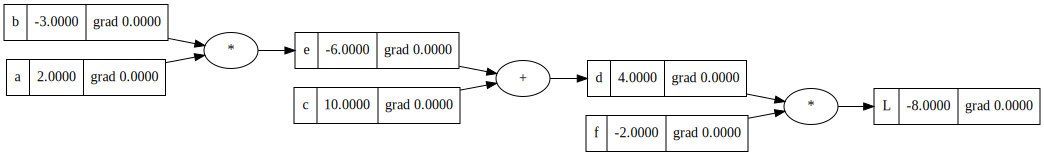

In [17]:
draw_dot(L)

In [18]:
# Do backpropagation - compute the gradient of weights with respect to L output
L.backward()

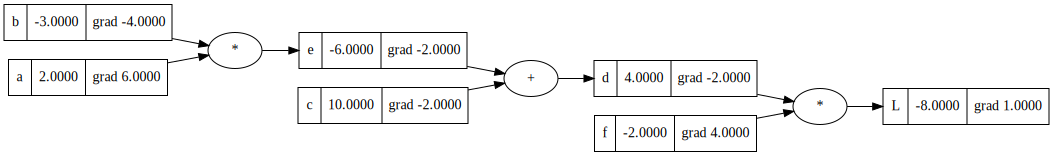

In [19]:
draw_dot(L)

### Backpropagation

In [20]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

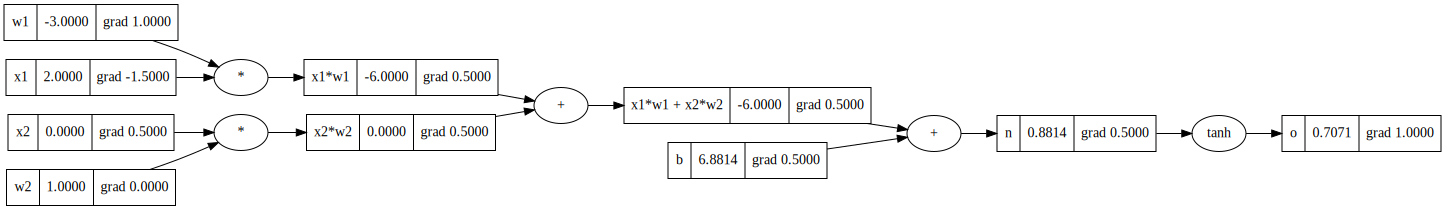

In [21]:
draw_dot(o)

#### Breaking tanh

![tanh_formula](tanh_formula.png)

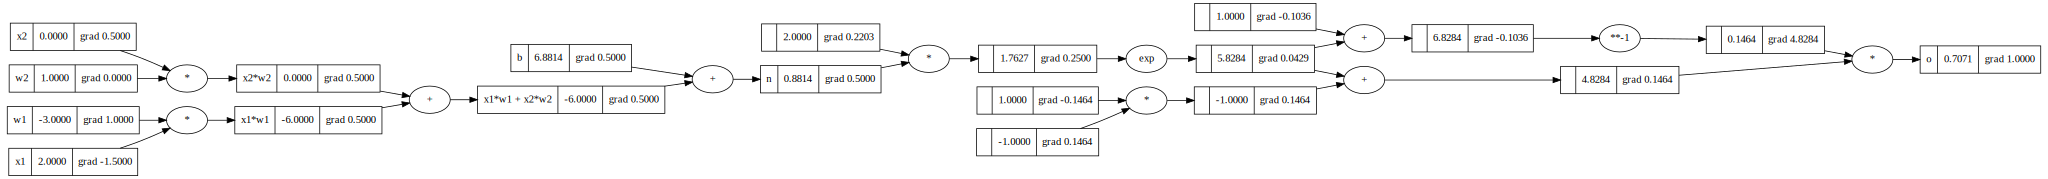

In [22]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ---- Breaking tanh using exponents
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

## PyTorch Implementation

In [24]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad= True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


# Neural Network - MLP

A multilayer perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN).

![multilayer_perceptron](multilayer_perceptron.png)

### Dataset

In [25]:
# Input data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets

### Multi-Layer Perceptron

In [26]:
# Define the MLP model
model = MLP(3, [4,4,1]) # 3 inputs, 2 hidden layers with 4 neurons, 1 output neuron

In [27]:
# Generate predictions
ypred = [model(x) for x in xs] # forward pass
# Compute loss function - Mean Squared Error
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=7.802903398155113)

In [28]:
# Backpropagation - calculate the derivative of the weights with respect to the loss function
loss.backward()

#### Gradient Descent

In [29]:
# Get the parameters of the model - weights and biases
model.parameters()

[Value(data=0.5197949387101655),
 Value(data=-0.4291460083822245),
 Value(data=0.48347715831706295),
 Value(data=-0.7512784795445704),
 Value(data=0.2189254681192465),
 Value(data=0.29281518158756303),
 Value(data=-0.9416613112529886),
 Value(data=0.5713493568356285),
 Value(data=-0.5789861579300231),
 Value(data=-0.10492220587754897),
 Value(data=-0.6505671522220438),
 Value(data=0.6346615245637692),
 Value(data=-0.15735395918016826),
 Value(data=-0.6578579452925957),
 Value(data=0.9386433057993429),
 Value(data=0.050189747543482044),
 Value(data=-0.5508884564502055),
 Value(data=0.1914749689750317),
 Value(data=-0.7291385548141456),
 Value(data=-0.6384595441216914),
 Value(data=0.04769368827730136),
 Value(data=-0.6764877796831275),
 Value(data=0.7442781618288787),
 Value(data=0.09411393670019907),
 Value(data=0.6998889978653702),
 Value(data=0.6165967103863859),
 Value(data=0.6358718006149522),
 Value(data=-0.8702808347573929),
 Value(data=0.7091036791461329),
 Value(data=0.39337528

In [30]:
# Gradient descent optimization
for p in model.parameters():
    p.data += -0.01 * p.grad

In [31]:
model.layers[0].neurons[0].w[0].data

0.520263721596618

In [32]:
model.layers[0].neurons[0].w[0].grad

-0.04687828864525957

In [33]:
ypred

[Value(data=0.9689930491668445),
 Value(data=0.9780460095095732),
 Value(data=0.9718695703068375),
 Value(data=0.968276993895206)]

In [34]:
# Reinitialize the dataset
# Input data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [35]:
for k in range(25):
    # forward pass
    ypred = [model(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    # zero grad
    for p in model.parameters():
        p.grad = 0.0
    
    # backward pass
    loss.backward()
    
    # update
    for p in model.parameters():
        p.data += -0.1 * p.grad
    
    print(k, loss.data)

0 7.79664149901795
1 7.716244497138515
2 7.511684976174127
3 6.421747048109483
4 2.946795319174857
5 0.20897695214744097
6 0.11123741959655434
7 0.07808457342555372
8 0.06038654948533271
9 0.04924824150241945
10 0.04156366724706306
11 0.03593437382115132
12 0.03163113840632937
13 0.028234551295622492
14 0.02548566822603158
15 0.02321574336614988
16 0.021310013779419698
17 0.019687675314695063
18 0.018290172432913136
19 0.017074028199008367
20 0.016006282349765887
21 0.015061492516750204
22 0.01421970682882314
23 0.013465059293279938
24 0.012784775487331769


In [36]:
ypred

[Value(data=0.9446501105332974),
 Value(data=-0.9586892699191314),
 Value(data=-0.9250671357829152),
 Value(data=0.9510137298443214)]

In [37]:
ys

[1.0, -1.0, -1.0, 1.0]

## Summary
- Neural nets are "simple" mathematical expressions 
- They take input as data. They take input the weights and parameters (weights and biases) of the neural net. 
- Mathematical expression forward pass followed by a loss function
- Loss function tries to measure the accuracy of the predictions. Usually, the loss will be low when your predictions are matching your targets. 
- Then, we backward the loss. We use backpropagation to get the gradient. 
- We tune all the parameters to decrease the loss locally. 
- We have to iterate this process many times - that's what's called the gradient descent. We simply follow the gradient information and that minimizes the loss and the loss is arranged when the loss is minimized and the neural network is doing what you want it to do.

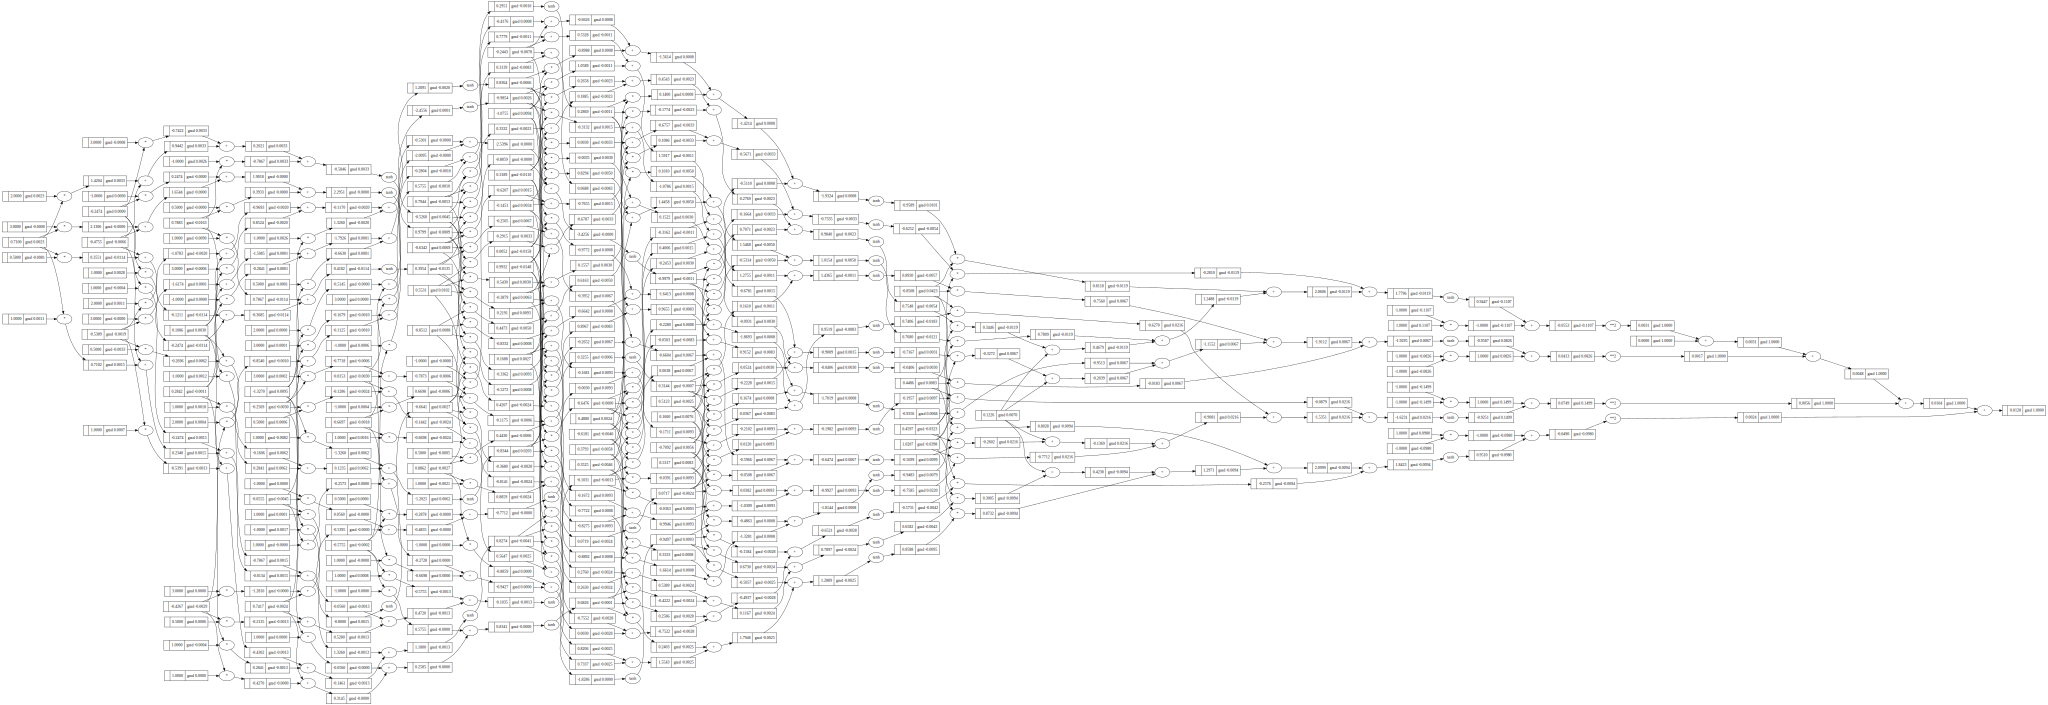

In [38]:
draw_dot(loss)